In [1]:
from google.colab import drive
drive.mount("gdrive")

Mounted at gdrive


In [2]:
from google.colab import drive
import os, zipfile

# Mount Google Drive
drive.mount('/content/gdrive')

# Path to your ZIP file
zip_path = "/content/gdrive/MyDrive/Dataset.zip"

# Folder to extract contents to
extract_path = "/content/"

# Create the destination folder if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
print(f"📂 Extracting {zip_path} → {extract_path}")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction complete.")
print("📁 Extracted folders:", os.listdir(extract_path))


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
📂 Extracting /content/gdrive/MyDrive/Dataset.zip → /content/
✅ Extraction complete.
📁 Extracted folders: ['.config', 'Dataset', 'gdrive', 'sample_data']


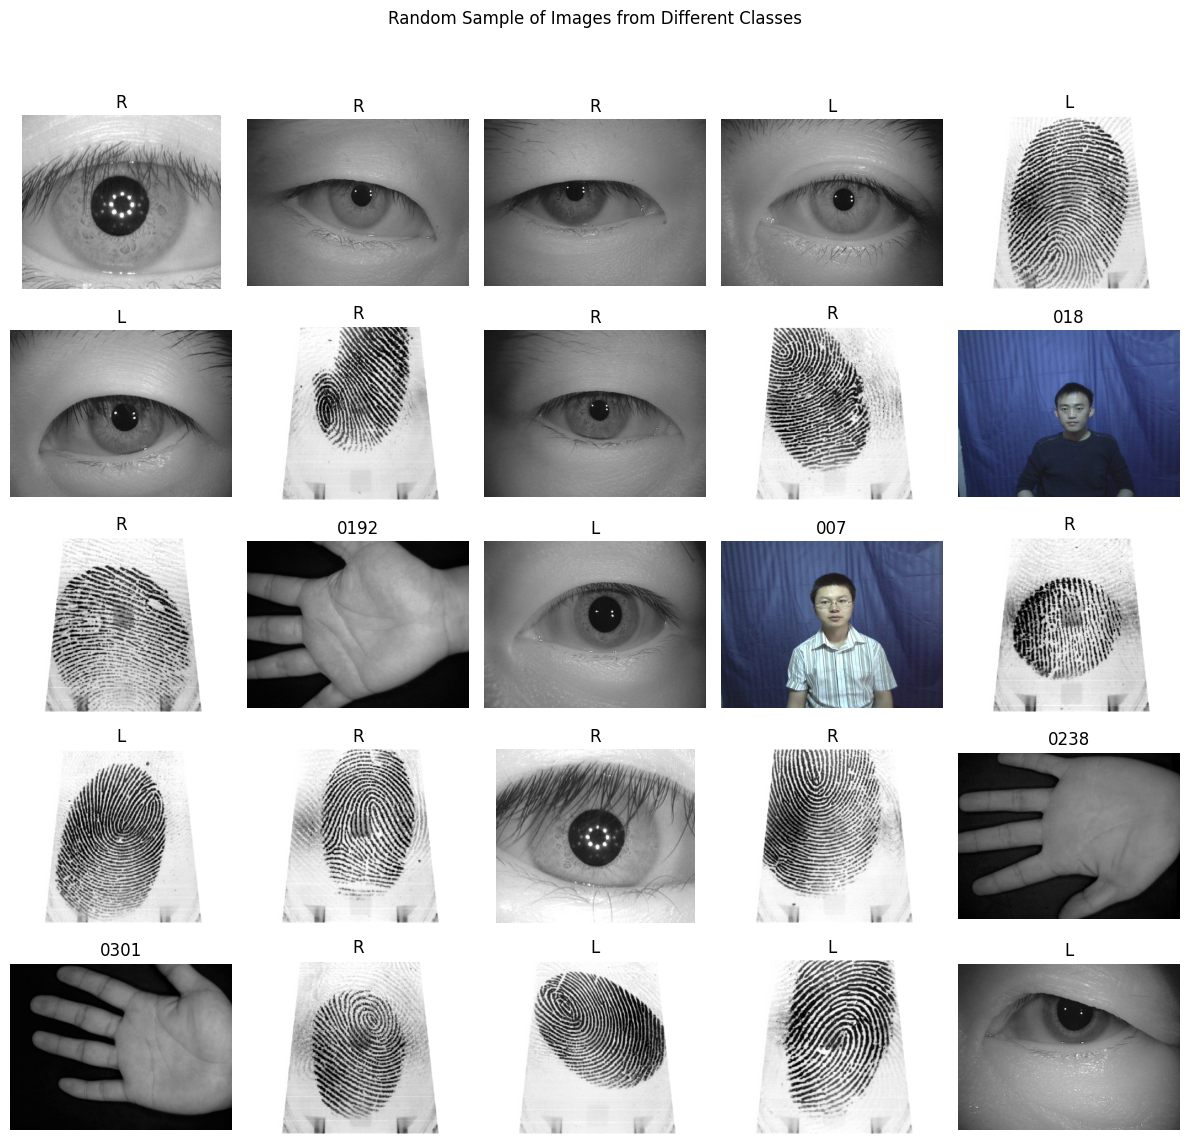

In [3]:
# Install missing package (only once)
!pip install imutils

# Import necessary libraries
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
from imutils import paths

# Get all image paths from the dataset folder
imagePaths = list(paths.list_images("/content/Dataset"))

# Function to display a grid of images
def display_images(image_paths, title, cols=5, num_images=25):
    random.shuffle(image_paths)  # Shuffle image order
    num_images = min(len(image_paths), num_images)
    rows = (num_images + cols - 1) // cols

    plt.figure(figsize=(12, 12))
    plt.suptitle(title)

    for i, image_path in enumerate(image_paths[:num_images]):
        plt.subplot(rows, cols, i + 1)
        img = Image.open(image_path).convert('RGB')
        plt.imshow(img)
        # Adjust the index if your folder structure is different
        plt.title(os.path.basename(os.path.dirname(image_path)))
        plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Display a random 5x5 grid of images
display_images(imagePaths, title="Random Sample of Images from Different Classes", num_images=25)


In [4]:
all_img  = list(paths.list_files("/content/Dataset"))
for img in all_img:
    if img.endswith(".db"):
        print(img)
        try:
            os.remove(img)
            print(f"Removed: {img}")
        except Exception as e:
            print(f"Error while removing {img}: {e}")

/content/Dataset/iris/CASIA-Iris-Interval/008/L/Thumbs.db
Removed: /content/Dataset/iris/CASIA-Iris-Interval/008/L/Thumbs.db
/content/Dataset/iris/CASIA-Iris-Interval/001/L/Thumbs.db
Removed: /content/Dataset/iris/CASIA-Iris-Interval/001/L/Thumbs.db
/content/Dataset/iris/CASIA-Iris-Interval/001/R/Thumbs.db
Removed: /content/Dataset/iris/CASIA-Iris-Interval/001/R/Thumbs.db
/content/Dataset/iris/CASIA-Iris-Interval/116/L/Thumbs.db
Removed: /content/Dataset/iris/CASIA-Iris-Interval/116/L/Thumbs.db
/content/Dataset/iris/CASIA-Iris-Interval/116/R/Thumbs.db
Removed: /content/Dataset/iris/CASIA-Iris-Interval/116/R/Thumbs.db
/content/Dataset/iris/CASIA-Iris-Twins/99/2L/Thumbs.db
Removed: /content/Dataset/iris/CASIA-Iris-Twins/99/2L/Thumbs.db
/content/Dataset/iris/CASIA-Iris-Lamp/029/R/Thumbs.db
Removed: /content/Dataset/iris/CASIA-Iris-Lamp/029/R/Thumbs.db
/content/Dataset/iris/CASIA-Iris-Lamp/209/L/Thumbs.db
Removed: /content/Dataset/iris/CASIA-Iris-Lamp/209/L/Thumbs.db
/content/Dataset/iris/

In [5]:
# get each bio metrics folder image
face_folder = os.listdir('/content/Dataset/Face')
palm_print_folder = os.listdir('/content/Dataset/Palmprint')
finger_print_folder = os.listdir('/content/Dataset/fingerprint')
iris_folder = os.listdir('/content/Dataset/iris/CASIA-Iris-Lamp')

In [6]:
# get palm id
palm_id = []
for i in palm_print_folder:
    palm_id.append(i[1:])

In [7]:
# get unique id from each bio metrics
ids_folder1 = set(face_folder)
ids_folder2 = set(palm_id)
ids_folder3 = set(finger_print_folder)
ids_folder4 = set(iris_folder)
common_ids = ids_folder1.intersection(ids_folder2, ids_folder3, ids_folder4)
print("Common IDs:", common_ids)


Common IDs: {'159', '225', '218', '019', '144', '258', '107', '084', '147', '134', '222', '291', '255', '204', '083', '045', '277', '138', '240', '038', '063', '166', '254', '013', '034', '217', '050', '087', '059', '208', '197', '142', '181', '072', '267', '301', '005', '025', '276', '031', '263', '311', '145', '312', '203', '132', '081', '244', '069', '065', '243', '118', '023', '216', '308', '199', '171', '234', '257', '185', '010', '303', '169', '039', '012', '290', '191', '124', '115', '120', '253', '066', '092', '249', '302', '064', '193', '060', '117', '292', '247', '037', '220', '309', '224', '200', '082', '139', '009', '293', '016', '163', '284', '014', '223', '113', '130', '288', '245', '055', '098', '100', '175', '177', '265', '033', '294', '078', '188', '061', '006', '103', '256', '167', '101', '172', '187', '280', '164', '080', '091', '189', '095', '057', '226', '300', '154', '179', '079', '260', '122', '067', '158', '131', '221', '123', '041', '152', '205', '007', '160', 

In [8]:
common = list(common_ids)
print("length of the common id:",len(common))
common.sort()

length of the common id: 309


In [9]:
if not os.path.exists("face"):
    os.mkdir("face")
if not os.path.exists("fingerprint"):
    os.mkdir("fingerprint")
if not os.path.exists("palm"):
    os.mkdir("palm")
if not os.path.exists("iris"):
    os.mkdir("iris")

In [10]:
import os
import shutil  # Make sure this is imported

# Define paths
source_folder = "/content/Dataset/Face"
destination_folder = "/content/face"

# Make sure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Example: list of common IDs (replace with your actual 'common' list)
# common = ['001', '002', '003']

# Move only matching IDs
for image_file in os.listdir(source_folder):
    if image_file in common:
        source_path = os.path.join(source_folder, image_file)
        dest_path = os.path.join(destination_folder, image_file)

        # Safety check to avoid overwriting
        if not os.path.exists(dest_path):
            shutil.move(source_path, destination_folder)
            print(f"Moved: {image_file}")
        else:
            print(f"Skipped (already exists): {image_file}")

print("✅ Files moved successfully!")


Moved: 174
Moved: 118
Moved: 163
Moved: 021
Moved: 219
Moved: 041
Moved: 212
Moved: 060
Moved: 048
Moved: 107
Moved: 147
Moved: 033
Moved: 168
Moved: 035
Moved: 082
Moved: 275
Moved: 260
Moved: 080
Moved: 311
Moved: 252
Moved: 235
Moved: 304
Moved: 214
Moved: 004
Moved: 205
Moved: 074
Moved: 268
Moved: 220
Moved: 016
Moved: 095
Moved: 054
Moved: 043
Moved: 178
Moved: 283
Moved: 298
Moved: 117
Moved: 217
Moved: 040
Moved: 109
Moved: 012
Moved: 176
Moved: 156
Moved: 062
Moved: 056
Moved: 085
Moved: 088
Moved: 030
Moved: 164
Moved: 130
Moved: 069
Moved: 018
Moved: 224
Moved: 241
Moved: 148
Moved: 103
Moved: 120
Moved: 234
Moved: 096
Moved: 153
Moved: 104
Moved: 301
Moved: 114
Moved: 050
Moved: 144
Moved: 064
Moved: 213
Moved: 254
Moved: 284
Moved: 042
Moved: 115
Moved: 193
Moved: 172
Moved: 218
Moved: 011
Moved: 084
Moved: 055
Moved: 089
Moved: 038
Moved: 036
Moved: 140
Moved: 293
Moved: 139
Moved: 006
Moved: 159
Moved: 111
Moved: 282
Moved: 190
Moved: 312
Moved: 102
Moved: 210
Moved: 308

In [11]:
destination_folder_fingerprint = '/content/fingerprint/'
fold_id = []
source_path = []
for image_file_fingerprint in os.listdir("/content/Dataset/fingerprint"):
    if image_file_fingerprint in common:
        # print(image_file_fingerprint)
        fold_id.append(image_file_fingerprint)
        source_path_fingerprint = os.path.join("/content/Dataset/fingerprint/", image_file_fingerprint)
        source_path.append(source_path_fingerprint)

        # # # Move the file to the destination folder
        shutil.move(source_path_fingerprint, destination_folder_fingerprint)


In [12]:
fingerprint_unique_id = os.listdir('/content/fingerprint')
len(fingerprint_unique_id)

309

In [1]:
import os, cv2, random, pickle, shutil, warnings
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from pathlib import Path
from tqdm.notebook import tqdm
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, f1_score, recall_score, roc_curve, auc
)
from sklearn.mixture import GaussianMixture as GMM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import (
    Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator, img_to_array, load_img
)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from imgaug import augmenters as iaa

warnings.filterwarnings("ignore")


In [2]:
import os
import shutil

# Destination folder
destination_folder_palm = '/content/palm/'
os.makedirs(destination_folder_palm, exist_ok=True)

# Example: define common IDs (replace with actual IDs)
common = ['001', '002', '003']  # <-- this must be defined

# Loop through Palmprint files and move the ones with common IDs
for image_file_palm in os.listdir("/content/Dataset/Palmprint"):
    unique_id = image_file_palm[1:]  # Adjust slicing based on your filenames

    if unique_id in common:
        source_path_palm = os.path.join("/content/Dataset/Palmprint", image_file_palm)
        dest_path_palm = os.path.join(destination_folder_palm, image_file_palm)

        if not os.path.exists(dest_path_palm):  # Avoid overwriting
            shutil.move(source_path_palm, destination_folder_palm)
            print(f"Moved: {image_file_palm}")
        else:
            print(f"Skipped (already exists): {image_file_palm}")

print("✅ Palmprint files moved successfully!")


Moved: 0001
Moved: 0003
Moved: 0002
✅ Palmprint files moved successfully!


In [3]:
palm_unique_id = os.listdir('/content/palm/')
len(palm_unique_id)

3

In [4]:
destination_folder_iris = '/content/iris/'

for image_file_iris in os.listdir("/content/Dataset/iris/CASIA-Iris-Lamp"):
    if image_file_iris in common:
        source_path_iris = os.path.join("/content/Dataset/iris/CASIA-Iris-Lamp", image_file_iris)

        # Move the file to the destination folder
        shutil.move(source_path_iris, destination_folder_iris)


In [5]:
iris_unique_id = os.listdir('/content/iris')
len(iris_unique_id)

3

In [6]:
class SimpleDatasetLoader:
	def __init__(self, preprocessors=None):
		# store the image preprocessor
		self.preprocessors = preprocessors

		# if the preprocessors are None, initialize them as an
		# empty list
		if self.preprocessors is None:
			self.preprocessors = []

	def load(self, imagePaths, verbose=-1):
		# initialize the list of features and labels
		data = []
		labels = []

		# loop over the input images
		for (i, imagePath) in enumerate(imagePaths):
			# load the image and extract the class label assuming
			# that our path has the following format:
			# /path/to/dataset/{class}/{image}.jpg
			image = cv2.imread(imagePath)
			# dip_weight = load_model("/content/gdrive/MyDrive/DIP/best_dip_denoising.hdf5")

			if imagePath.split(os.path.sep)[-2] == 'R':
				label = imagePath.split(os.path.sep)[-3]

			else:
				label = imagePath.split(os.path.sep)[-2]
			# check to see if our preprocessors are not None
			if self.preprocessors is not None:
				# loop over the preprocessors and apply each to
				# the image
				for p in self.preprocessors:
					image = p.preprocess(image)

			# treat our processed image as a "feature vector"
			# by updating the data list followed by the labels
			data.append(image)
			labels.append(label)

			# show an update every `verbose` images
			if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
				print("[INFO] processed {}/{}".format(i + 1,
					len(imagePaths)))

		# return a tuple of the data and labels
		return (np.array(data), np.array(labels))

In [ ]:

import cv2
class SimplePreprocessor:
	def __init__(self, width, height, inter=cv2.INTER_AREA):
		# store the target image width, height, and interpolation
		# method used when resizing
		self.width = width
		self.height = height
		self.inter = inter

	def preprocess(self, image):
		# resize the image to a fixed size, ignoring the aspect
		# ratio
		return cv2.resize(image, (self.width, self.height),
			interpolation=self.inter)

In [7]:
class ImageToArrayPreprocessor:
	def __init__(self, dataFormat=None):
		# store the image data format
		self.dataFormat = dataFormat

	def preprocess(self, image):
		# apply the Keras utility function that correctly rearranges
		# the dimensions of the image
		return img_to_array(image, data_format=self.dataFormat)

In [10]:
import os
import shutil
# # palm
# id:0075,no of image-0(need to remove)
# id:0167,no of image-0(need to remove)

#  #iris
# id:253,no of image-0(need to remove)
# id:255,no of image-0(need to remove)
id_no = ['075', '167', '253', '255']
bio_metrics = ["face","fingerprint","palm","iris"]
for name in bio_metrics:
    print(name)
    for id in id_no:
        if name =="palm":
            id = "0"+id
        directory_path = os.path.join("/content/{}".format(name), id)
        if os.path.exists(directory_path):
            try:
                shutil.rmtree(directory_path)
                print(f"Directory '{directory_path}' and its contents have been successfully removed.")
            except OSError as e:
                print(f"Error: {e}")
        else:
            print(f"Directory '{directory_path}' does not exist.")


face
Directory '/content/face/075' and its contents have been successfully removed.
Directory '/content/face/167' and its contents have been successfully removed.
Directory '/content/face/253' and its contents have been successfully removed.
Directory '/content/face/255' and its contents have been successfully removed.
fingerprint
Directory '/content/fingerprint/075' and its contents have been successfully removed.
Directory '/content/fingerprint/167' and its contents have been successfully removed.
Directory '/content/fingerprint/253' and its contents have been successfully removed.
Directory '/content/fingerprint/255' and its contents have been successfully removed.
palm
Directory '/content/palm/0075' does not exist.
Directory '/content/palm/0167' does not exist.
Directory '/content/palm/0253' does not exist.
Directory '/content/palm/0255' does not exist.
iris
Directory '/content/iris/075' does not exist.
Directory '/content/iris/167' does not exist.
Directory '/content/iris/253' doe

In [11]:



# Import imgaug augmenters
from imgaug import augmenters as iaa

# Define the augmentation sequence
augmentation = iaa.Sequential([
    iaa.GaussianBlur(sigma=(0, 1.0)),
    iaa.AdditiveGaussianNoise(scale=(0, 0.05 * 255)),
    iaa.LinearContrast((0.5, 2.0))  # Updated from ContrastNormalization
])


In [12]:
import os
face_path = "/content/face/"
face_imagepath = []
face_img_id = os.listdir(face_path)
for face_id in face_img_id:
    id_img = os.listdir(os.path.join(face_path, face_id))
    id_img_with_path = [os.path.join(face_path, face_id, img) for img in id_img]
    face_imagepath.extend(id_img_with_path)

In [13]:
import os
palm_path = "/content/palm/"
palm_imagepath = []
face_img_id = os.listdir(palm_path)
for face_id in face_img_id:
    id_img = os.listdir(os.path.join(palm_path,face_id))
    id_img_with_path = [os.path.join(palm_path, face_id, img) for img in id_img]
    if len(id_img_with_path)>=5:
        palm_imagepath.extend(id_img_with_path[:5])

In [14]:
fingerprint_fold_path = "/content/fingerprint/"
finger_imagepath = []
for root, dirs, files in os.walk(fingerprint_fold_path):
    for dir in dirs:
        if dir == 'R':
            subfolder_path = os.path.join(root, dir)
            id_img = os.listdir(subfolder_path)
            id_img_with_path = [os.path.join(root,subfolder_path, img) for img in id_img]
            finger_imagepath.extend(id_img_with_path[:5])

In [15]:
from imutils import paths
folder_path_iris = "/content/iris/"
iris_imagepath = []
# Iterate through all subdirectories and their subdirectories
for root, dirs, files in os.walk(folder_path_iris):
    for dir in dirs:
        if dir == 'R':
            # Construct the full path to the 'R' subfolder
            subfolder_path_iris = os.path.join(root, dir)

            # Use paths.list_images to get the image paths in the 'R' subfolder
            images_in_subfolder_iris = list(paths.list_images(subfolder_path_iris))
            if len(images_in_subfolder_iris)>=5:
                # Extend finger_imagepath with the image paths in the 'R' subfolder
                iris_imagepath.extend(images_in_subfolder_iris[:5])

In [ ]:
# ================================
# 🔥 MULTI-MODAL BIOMETRIC TRAINING (Face, Fingerprint, Palm, Iris)
# ================================

import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from PIL import Image
from tqdm import tqdm
import numpy as np

# -------------------------
# CONFIGURATION
# -------------------------
BASE_PATH = "/content"   # ✅ CHANGE if needed
BIOMETRIC_FOLDERS = [
    "face",
    "fingerprint",
    "palm",
    "iris"
]
IMG_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 10
LR = 1e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🖥 Using device: {DEVICE}")

# -------------------------
# DATASET CLASS
# -------------------------
class MultiBiometricDataset(Dataset):
    def __init__(self, base_path, folders, transform=None):
        self.samples = []
        self.transform = transform

        label_map = {}
        label_counter = 0

        for folder in folders:
            folder_path = os.path.join(base_path, folder)
            if not os.path.exists(folder_path):
                print(f"⚠️ Missing folder: {folder_path}")
                continue

            for person_id in os.listdir(folder_path):
                person_dir = os.path.join(folder_path, person_id)
                if not os.path.isdir(person_dir):
                    continue

                # assign numeric ID
                if person_id not in label_map:
                    label_map[person_id] = label_counter
                    label_counter += 1

                label = label_map[person_id]

                for img_name in os.listdir(person_dir):
                    if img_name.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
                        img_path = os.path.join(person_dir, img_name)
                        self.samples.append((img_path, label))

        print(f"✅ Total samples: {len(self.samples)} from {len(label_map)} IDs")
        self.label_map = label_map
        self.inv_label_map = {v: k for k, v in label_map.items()}

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label


transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])

dataset = MultiBiometricDataset(BASE_PATH, BIOMETRIC_FOLDERS, transform)
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)


model = models.vit_b_16(pretrained=True)
num_classes = len(dataset.label_map)
model.heads.head = nn.Linear(model.heads.head.in_features, num_classes)
model = model.to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)


for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    print(f"✅ Epoch [{epoch+1}/{EPOCHS}] | Loss: {running_loss/len(train_loader):.4f} | Accuracy: {acc:.2f}%")


os.makedirs("/content/outputs", exist_ok=True)
torch.save(model.state_dict(), "/content/outputs/biometric_vit_model.pth")
np.save("/content/outputs/label_map.npy", dataset.label_map)

print("\n🎯 Training complete!")
print("💾 Model saved at: /content/outputs/biometric_vit_model.pth")
print("🧠 Label map saved at: /content/outputs/label_map.npy")
print(f"👤 Total IDs trained: {len(dataset.label_map)}")


def predict_image(img_path, model, label_map):
    model.eval()
    img = Image.open(img_path).convert("RGB")
    img = transform(img).unsqueeze(0).to(DEVICE)
    with torch.no_grad():
        out = model(img)
        pred = torch.argmax(out, dim=1).item()
    inv_map = {v: k for k, v in label_map.items()}
    return inv_map[pred]




🖥 Using device: cuda
✅ Total samples: 1573 from 311 IDs
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth


100%|██████████| 330M/330M [00:02<00:00, 144MB/s]
Epoch 1/10: 100%|██████████| 99/99 [01:04<00:00,  1.54it/s]


✅ Epoch [1/10] | Loss: 5.6490 | Accuracy: 2.10%


Epoch 2/10: 100%|██████████| 99/99 [01:01<00:00,  1.61it/s]


✅ Epoch [2/10] | Loss: 3.6826 | Accuracy: 44.63%


Epoch 3/10: 100%|██████████| 99/99 [01:02<00:00,  1.59it/s]


✅ Epoch [3/10] | Loss: 0.9186 | Accuracy: 96.25%


Epoch 4/10: 100%|██████████| 99/99 [01:02<00:00,  1.58it/s]


✅ Epoch [4/10] | Loss: 0.1366 | Accuracy: 100.00%


Epoch 5/10: 100%|██████████| 99/99 [01:02<00:00,  1.60it/s]


✅ Epoch [5/10] | Loss: 0.0490 | Accuracy: 100.00%


Epoch 6/10: 100%|██████████| 99/99 [01:02<00:00,  1.60it/s]


✅ Epoch [6/10] | Loss: 0.0316 | Accuracy: 100.00%


Epoch 7/10: 100%|██████████| 99/99 [01:02<00:00,  1.60it/s]


✅ Epoch [7/10] | Loss: 0.0234 | Accuracy: 100.00%


Epoch 8/10: 100%|██████████| 99/99 [01:01<00:00,  1.60it/s]


✅ Epoch [8/10] | Loss: 0.0184 | Accuracy: 100.00%


Epoch 9/10: 100%|██████████| 99/99 [01:02<00:00,  1.59it/s]


✅ Epoch [9/10] | Loss: 0.0150 | Accuracy: 100.00%


Epoch 10/10: 100%|██████████| 99/99 [01:01<00:00,  1.60it/s]


✅ Epoch [10/10] | Loss: 0.0125 | Accuracy: 100.00%

🎯 Training complete!
💾 Model saved at: /content/outputs/biometric_vit_model.pth
🧠 Label map saved at: /content/outputs/label_map.npy
👤 Total IDs trained: 311



📊 Generating Confusion Matrix...


Evaluating: 100%|██████████| 99/99 [00:25<00:00,  3.87it/s]


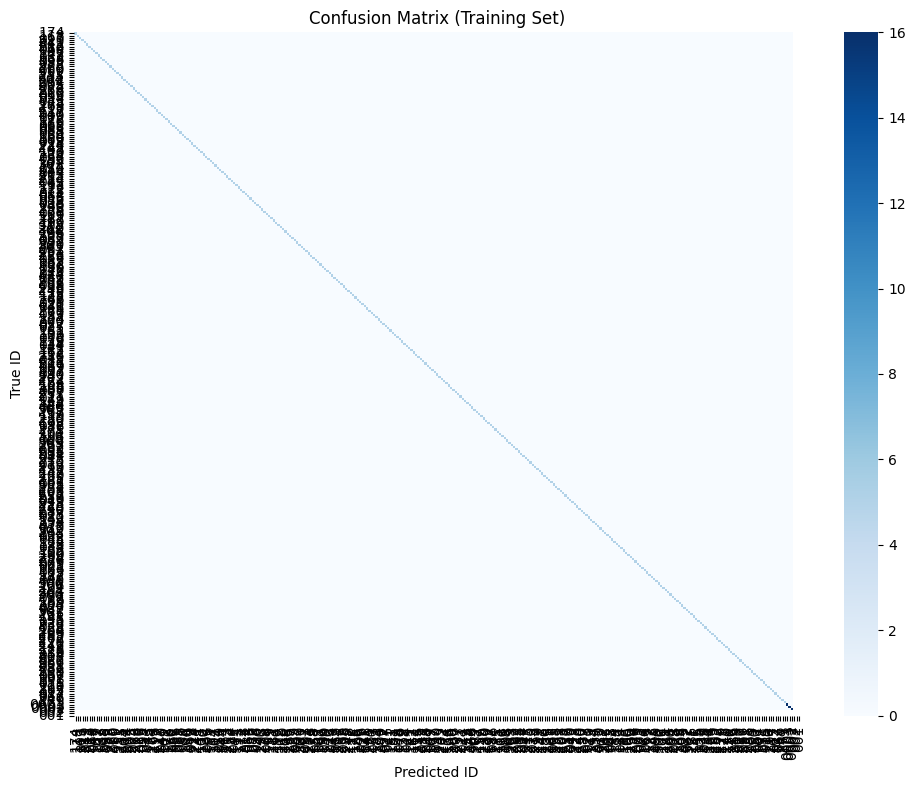

✅ Confusion matrix saved at /content/outputs/confusion_matrix.png


In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

print("\n📊 Generating Confusion Matrix...")

# Put model in evaluation mode
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for imgs, labels in tqdm(train_loader, desc="Evaluating"):
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
id_labels = [dataset.inv_label_map[i] for i in range(len(dataset.inv_label_map))]

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues",
            xticklabels=id_labels, yticklabels=id_labels)
plt.title("Confusion Matrix (Training Set)")
plt.xlabel("Predicted ID")
plt.ylabel("True ID")
plt.tight_layout()

os.makedirs("/content/outputs", exist_ok=True)
plt.savefig("/content/outputs/confusion_matrix.png", dpi=150)
plt.show()

print("✅ Confusion matrix saved at /content/outputs/confusion_matrix.png")



📸 Please upload the Face image:


Saving 008_0.bmp to 008_0.bmp
✅ Face image uploaded successfully.

📸 Please upload the Palmprint image:


Saving 0008_m_l_01.jpg to 0008_m_l_01.jpg
✅ Palmprint image uploaded successfully.

📸 Please upload the Fingerprint image:


Saving 008_R0_1.bmp to 008_R0_1.bmp
✅ Fingerprint image uploaded successfully.

📸 Please upload the Iris image:


Saving S2008R02.jpg to S2008R02.jpg
✅ Iris image uploaded successfully.


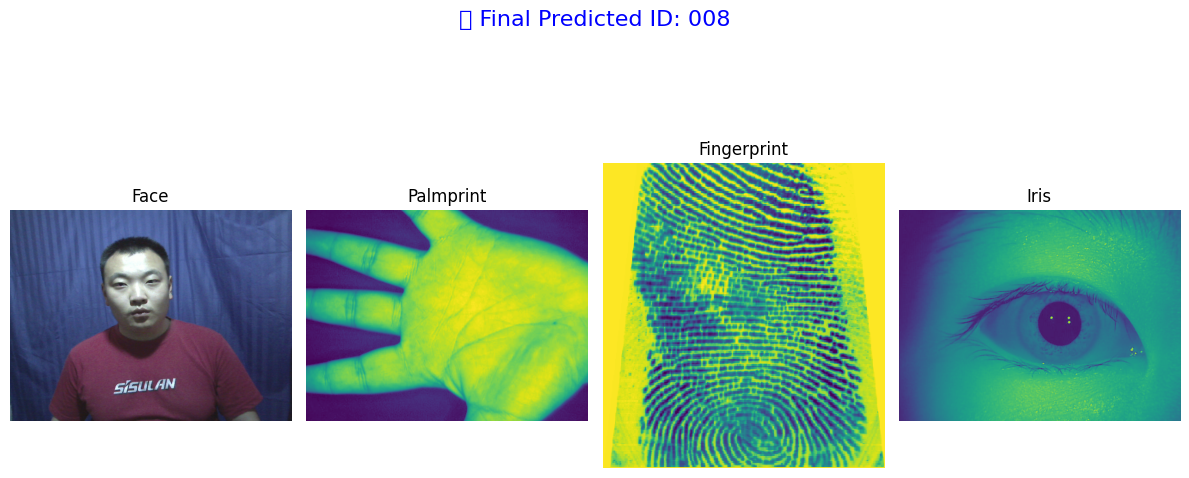


✅ Final Predicted ID: 008


In [ ]:

import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import os, shutil

# ====== SETUP ======
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load trained model
MODEL_PATH = "/content/outputs/biometric_vit_model.pth"  # change if needed
model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
model.to(DEVICE)
model.eval()

# Image transform (same as training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Temporary folder to hold uploaded images
upload_dir = "/content/temp_uploads"
os.makedirs(upload_dir, exist_ok=True)

# Store modality names in order
modalities = ["Face", "Palmprint", "Fingerprint", "Iris"]
uploaded_paths = []
outputs = []

# ====== UPLOAD LOOP ======
for i, modality in enumerate(modalities):
    print(f"\n📸 Please upload the {modality} image:")
    uploaded = files.upload()

    if len(uploaded) != 1:
        print("⚠️ Please upload exactly one image.")
        break

    img_name = list(uploaded.keys())[0]
    src_path = os.path.join("/content", img_name)
    dst_path = os.path.join(upload_dir, img_name)
    shutil.move(src_path, dst_path)   # ✅ Move file to temp_uploads
    uploaded_paths.append(dst_path)

    # Preprocess and predict
    img = Image.open(dst_path).convert("RGB")
    img_t = transform(img).unsqueeze(0).to(DEVICE)

    with torch.no_grad():
        logits = model(img_t)
        probs = F.softmax(logits, dim=1)
        outputs.append(probs)

    print(f"✅ {modality} image uploaded successfully.")

# ====== FUSION (AFTER 4 UPLOADS) ======
if len(outputs) == 4:
    avg_output = torch.mean(torch.stack(outputs), dim=0)
    _, final_pred = torch.max(avg_output, 1)

    # If you have a label mapping dictionary
    try:
        predicted_id = dataset.inv_label_map[final_pred.item()]
    except:
        predicted_id = int(final_pred.item())

    # ====== DISPLAY RESULTS ======
    plt.figure(figsize=(12, 6))
    for i, img_path in enumerate(uploaded_paths, 1):
        img = Image.open(img_path)
        plt.subplot(1, 4, i)
        plt.imshow(img)
        plt.axis("off")
        plt.title(modalities[i-1])

    plt.suptitle(f"🧠 Final Predicted ID: {predicted_id}", fontsize=16, color='blue')
    plt.tight_layout()
    plt.show()

    print(f"\n✅ Final Predicted ID: {predicted_id}")
else:
    print("❌ Not all 4 images uploaded properly.")

# ====== CLEANUP ======
shutil.rmtree(upload_dir, ignore_errors=True)
